In [1]:
import os

import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"]  = "python"
import mrcnn.visualize
import mrcnn.config
import mrcnn.model
from datasets import load_dataset
import warnings
import cv2
import pathlib

In [2]:
WEIGHTS_PATH = pathlib.Path("weights")
WEIGHTS_PATH.mkdir(exist_ok=True)

WEIGHTS_CHECKPOINT_PATH = WEIGHTS_PATH.joinpath("checkpoints")
WEIGHTS_CHECKPOINT_PATH.mkdir(exist_ok=True)

COCO_WEIGHTS = WEIGHTS_PATH.joinpath("mask_rcnn_coco.h5")
FROG_WEIGHTS = list(WEIGHTS_CHECKPOINT_PATH.glob("*.h5"))[-1]
#FROG_WEIGHTS = WEIGHTS_PATH.joinpath("mask_rcnn_frog_students.h5")


CLASS_NAME = "frog_stomach"
CLASS_NAMES = ["BG", CLASS_NAME]
FROG_IMAGES = "./frog_photos"
FROG_DATASET = "./pelophylax_lessonae" ""#"perara/pelophylax_lessonae"

In [3]:
class FrogStomachConfig(mrcnn.config.Config):
    NAME = CLASS_NAME
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 2
    STEPS_PER_EPOCH = 150


In [52]:
ds = load_dataset(
    FROG_DATASET,
    name="default",
    splits=["validation"],
    image_dir=FROG_IMAGES,
    dataset_dir=FROG_DATASET
)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_inference = mrcnn.model.MaskRCNN(mode="inference",
                                           config=FrogStomachConfig(),
                                           model_dir=os.getcwd())

    model_inference.load_weights(filepath=FROG_WEIGHTS.absolute(),
                                 by_name=True)

    for sample in ds["validation"]:
        image = cv2.imread(sample["image_path"])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        r = model_inference.detect([image], verbose=1)


        # Get the results for the first image.

        break

Using custom data configuration default-9ea5fe6f013ef228
Found cached dataset pelophylax_lessonae (/home/per/.cache/huggingface/datasets/pelophylax_lessonae/default-9ea5fe6f013ef228/0.0.0/e3d448178a59568d51f6b4f5bff85105604bdf9469c96fd6494e7c2d76c25e3c)


  0%|          | 0/1 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Processing 1 images
image                    shape: (2592, 3872, 3)       min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 3872.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  

(2592, 3872, 3)
(2592, 3872, 35)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['BG', 'frog_stomach']
25572


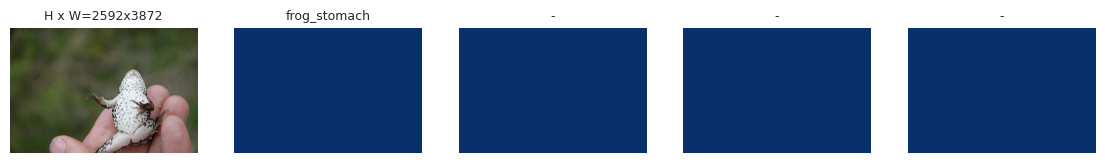

[[   0    0    1 3872]
 [   0    0    1 3872]
 [   0    0    1 3872]
 [   0    0    1 3872]
 [   0    0    1 3872]
 [   0    0    1 3872]
 [   0    0    1 3872]
 [   0 2075    1 3872]
 [   0    0    1  735]
 [   0 3338    1 3496]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]
 [   0    0    1    1]]


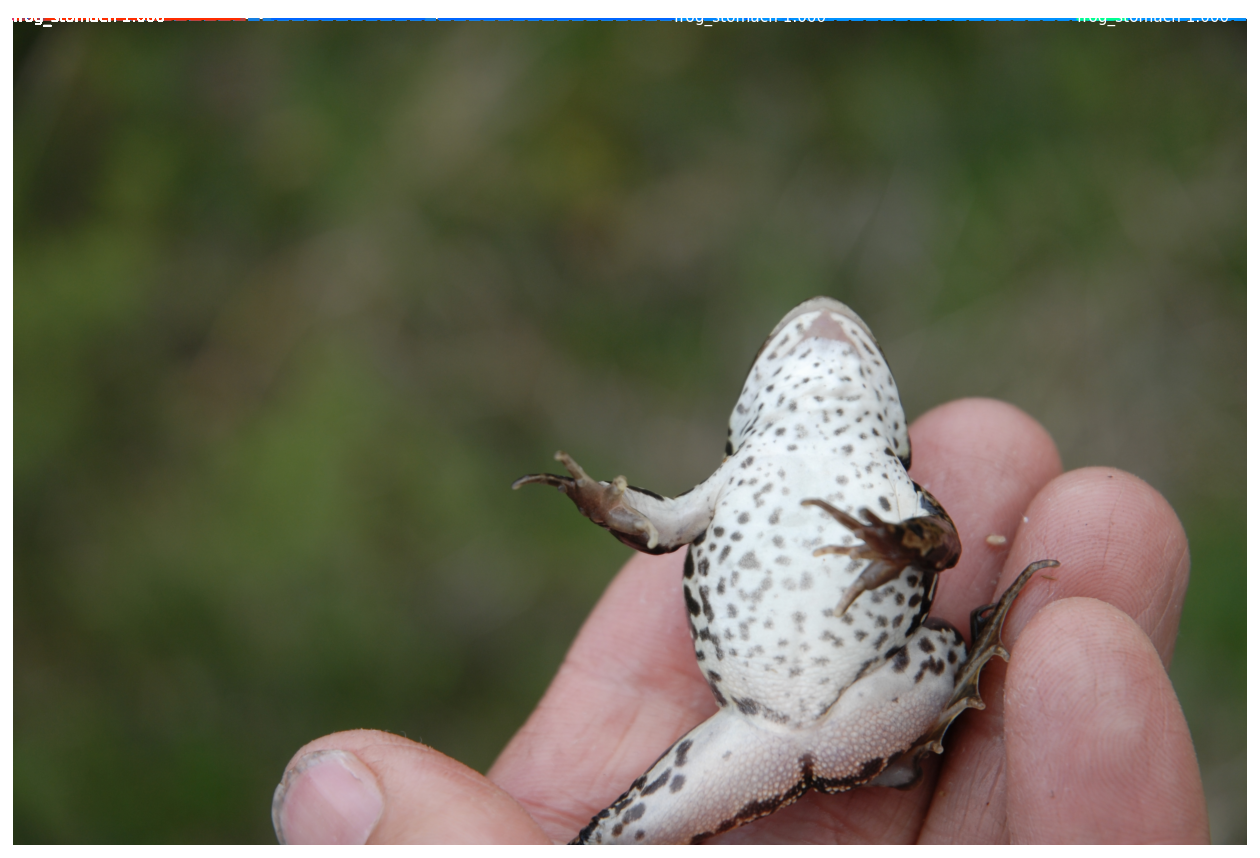

In [56]:
import numpy as np
import cv2
pred = r[0]

the_mask = pred["masks"]

print(image.shape)
print(the_mask.shape)
print(pred['class_ids'])
print(CLASS_NAMES)

print(np.sum(the_mask, axis=None))

mrcnn.visualize.display_top_masks(image, the_mask, pred['class_ids'], CLASS_NAMES)

print(pred['rois'])

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image,
                                  boxes=pred['rois'],
                                  masks=pred['masks'],
                                  class_ids=pred['class_ids'],
                                  class_names=CLASS_NAMES,
                                  scores=pred['scores'])


